In [ ]:
!pip install brian2tools

     |████████████████████████████████| 1.2MB 7.5MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257142 sha256=98ae8d595aec9e6428e64e7ace781bb371573862e894e923a9dba8da052d2099
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


#import libraries

In [ ]:
from brian2 import *
%matplotlib inline
import random
import math

# 2 Excitatory Neuron

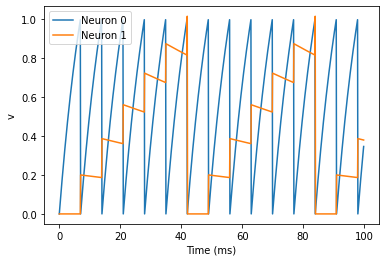

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0]
G.tau = [10, 100]*ms

S = Synapses(G, G, on_pre='v_post += 0.2')

S.connect(i=0, j=1)

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();


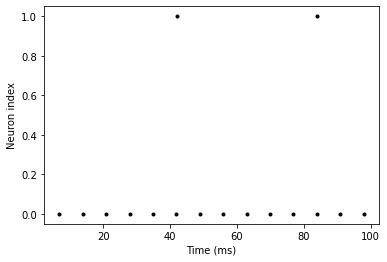

In [ ]:
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

2 Excitatory neuron and 1 Inhibitory neuron

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 2, 3]
G.tau = [15, 20, 15]*ms

G1 = G[:2]
G2 = G[2:]

Se = Synapses(G1, G, on_pre='v_post += 0.2')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect()
Si.connect()

M = StateMonitor(G, 'v', record=True)
exc_mon = SpikeMonitor(G[:2])
inh_mon = SpikeMonitor(G[2:])

run(100*ms)

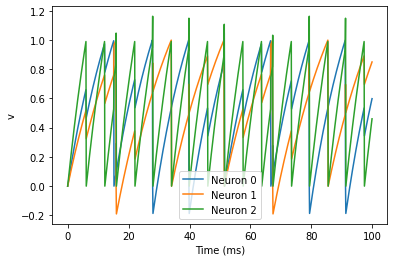

In [ ]:
plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')

xlabel('Time (ms)')
ylabel('v')
legend(); 

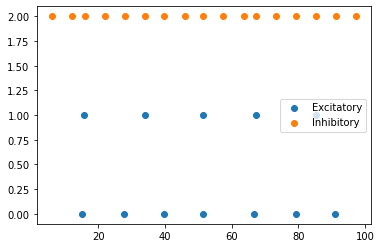

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+2, label='Inhibitory')
plt.legend()

# Question 1

## 800 Excitatory and 200 Inhabitory
Constant current input

Excitatory probablity = 0.05

Inhabitory probability = 0.1

In [ ]:
start_scope()


eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = []
for i in range(1000):
  I.append(random.random() * 2)

for i in range(1000):
  tau.append(100)
  
G = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='exact')

G.I = I
G.tau = tau*ms
G1 = G[:800]
G2 = G[800:]

Se = Synapses(G1, G, on_pre='v_post += 0.1')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect(p=0.05)
Si.connect(p=0.1)

M = StateMonitor(G, 'v', record=True)
exc_mon = SpikeMonitor(G[:800])
inh_mon = SpikeMonitor(G[800:])

run(1000*ms)

No handles with labels found to put in legend.


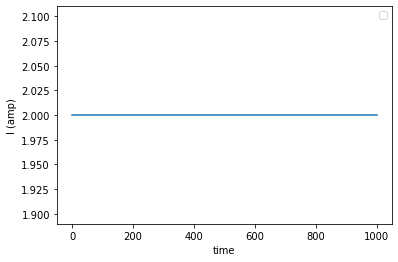

In [ ]:
I = lambda x: 2
plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

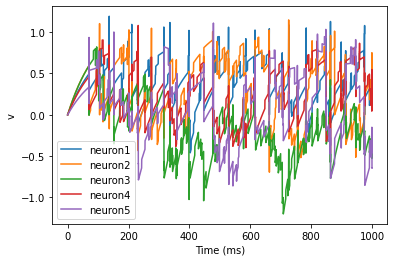

In [ ]:
for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

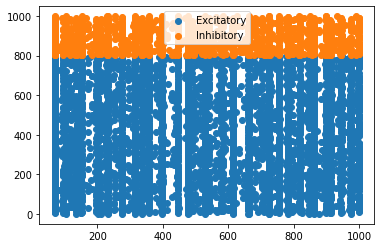

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

## 800 Excitatory and 200 Inhabitory
Sin current input

Excitatory probablity = 0.05

Inhabitory probability = 0.1

In [ ]:
start_scope()


eqs = '''
dv/dt = (I + 2 * sin(2*pi*100*Hz*t)-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = []
for i in range(1000):
  I.append(random.random())

for i in range(1000):
  tau.append(100)
  
G = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='euler')

G.I = I
G.tau = tau*ms
G1 = G[:800]
G2 = G[800:]

Se = Synapses(G1, G, on_pre='v_post += 0.1')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect(p=0.05)
Si.connect(p=0.1)

M = StateMonitor(G, 'v', record=True)
exc_mon = SpikeMonitor(G[:800])
inh_mon = SpikeMonitor(G[800:])

run(1000*ms)

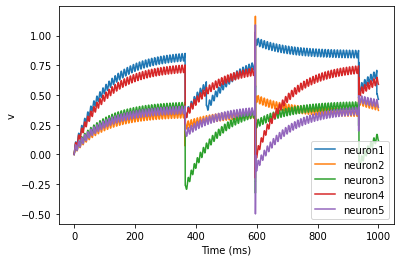

In [ ]:
for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

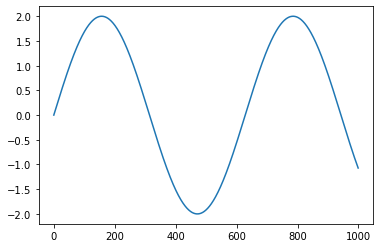

In [ ]:
I = lambda x: 2 * math.sin(x/100)

plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

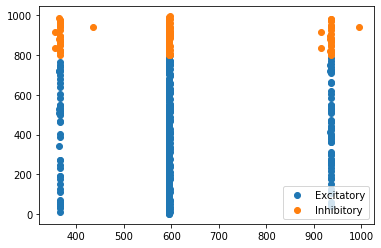

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

## 800 Excitatory and 200 Inhabitory
Sin current input + 0.5

Excitatory probablity = 0.05

Inhabitory probability = 0.1

In [ ]:
start_scope()


eqs = '''
dv/dt = (I + 0.5 + 1.5 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = []
for i in range(1000):
  I.append(random.random())

for i in range(1000):
  tau.append(100)
  
G = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='euler')

G.I = I
G.tau = tau*ms
G1 = G[:800]
G2 = G[800:]

Se = Synapses(G1, G, on_pre='v_post += 0.1')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect(p=0.05)
Si.connect(p=0.1)

exc_mon = SpikeMonitor(G[:800])
inh_mon = SpikeMonitor(G[800:])

M = StateMonitor(G, 'v', record=True)

run(1000*ms)

No handles with labels found to put in legend.


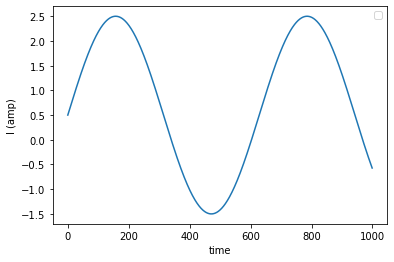

In [ ]:
I = lambda x: 2 * math.sin(x/100) + 0.5

plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

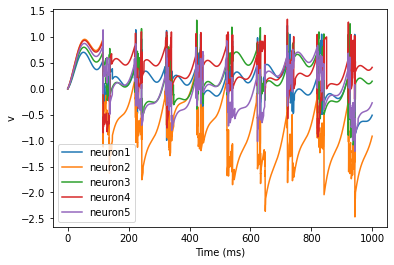

In [ ]:
for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

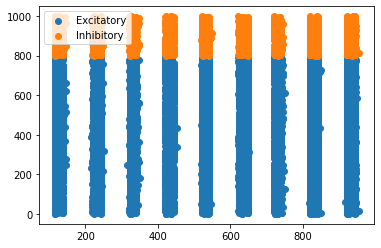

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

## 800 Excitatory and 200 Inhabitory
Sin current input + 0.5

Excitatory probablity = 0.05

Inhabitory probability = 0.2

In [ ]:
start_scope()


eqs = '''
dv/dt = (I + 0.5 + 1.5 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = []
for i in range(1000):
  I.append(random.random())

for i in range(1000):
  tau.append(100)
  
G = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='euler')

G.I = I
G.tau = tau*ms
G1 = G[:800]
G2 = G[800:]

Se = Synapses(G1, G, on_pre='v_post += 0.1')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect(p=0.05)
Si.connect(p=0.2)

exc_mon = SpikeMonitor(G[:800])
inh_mon = SpikeMonitor(G[800:])

M = StateMonitor(G, 'v', record=True)

run(1000*ms)

No handles with labels found to put in legend.


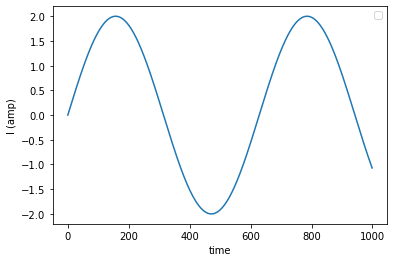

In [ ]:
I = lambda x: 2 * math.sin(x/100)

plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

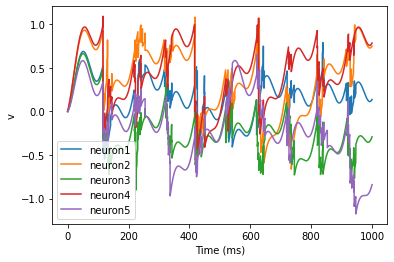

In [ ]:
for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

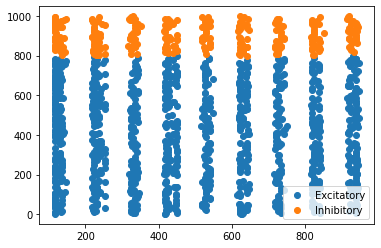

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

## 800 Excitatory and 200 Inhabitory
Sin current input + 0.5

Excitatory probablity = 0.1

Inhabitory probability = 0.1

In [ ]:
start_scope()


eqs = '''
dv/dt = (I + 0.5 + 1.5 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = []
for i in range(1000):
  I.append(random.random())

for i in range(1000):
  tau.append(100)
  
G = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='euler')

G.I = I
G.tau = tau*ms
G1 = G[:800]
G2 = G[800:]

Se = Synapses(G1, G, on_pre='v_post += 0.1')
Si = Synapses(G2, G, on_pre='v_post -= 0.2')

Se.connect(p=0.1)
Si.connect(p=0.1)

exc_mon = SpikeMonitor(G[:800])
inh_mon = SpikeMonitor(G[800:])

M = StateMonitor(G, 'v', record=True)

run(1000*ms)

No handles with labels found to put in legend.


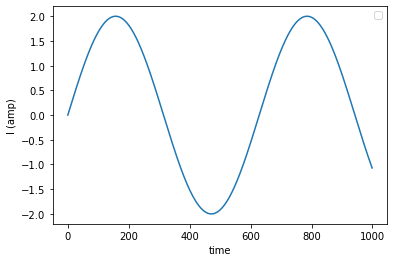

In [ ]:
I = lambda x: 2 * math.sin(x/100)

plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

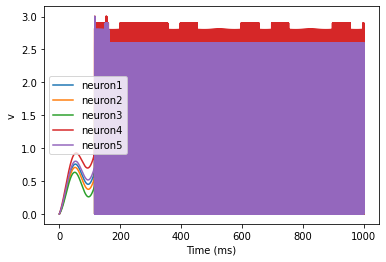

In [ ]:
for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

WARNING    /usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
 [py.warnings]
WARNING    /usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


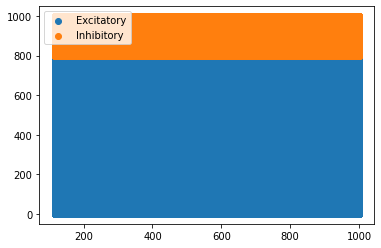

In [ ]:
plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

# Question2

In [ ]:
start_scope()


eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
eqsi = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

I1 = []
I2 = []
I3 = []
tau = []

for i in range(200):
  I1.append(random.random())
  I2.append(random.random()* 2)
  I3.append(random.random() * 0.1)
for i in range(200):
  tau.append(100)
  
Gx1 = NeuronGroup(200, eqs, threshold='v>1', reset='v = 0', method='exact')
Gx2 = NeuronGroup(200, eqs, threshold='v>1', reset='v = 0', method='exact')
Gi = NeuronGroup(200, eqsi, threshold='v>1', reset='v = 0', method='exact')

Gx1.I = I1
Gx1.tau = tau*ms
Gx2.I = I2
Gx2.tau = tau*ms
Gi.I = I3
Gi.tau = tau*ms

Se1 = Synapses(Gx1, Gx1, on_pre='v_post += 0.1')
Se2 = Synapses(Gx2, Gx2, on_pre='v_post += 0.1')
Sei1 = Synapses(Gx1, Gi, on_pre='v_post += 0.05')
Sei2 = Synapses(Gx2, Gi, on_pre='v_post += 0.05')
Sii =  Synapses(Gi, Gi, on_pre='v_post -= 0.2')

Se1.connect(p=0.05)
Se2.connect(p=0.05)
Sei1.connect(p=0.05)
Sei2.connect(p=0.05)
Sii.connect(p=0.1)

exc1 = SpikeMonitor(Gx1)
exc2 = SpikeMonitor(Gx2)
inh = SpikeMonitor(Gi)

M1 = StateMonitor(Gx1, 'v', record=True)
M2 = StateMonitor(Gx2, 'v', record=True)
M3 = StateMonitor(Gi, 'v', record=True)

run(1000*ms)

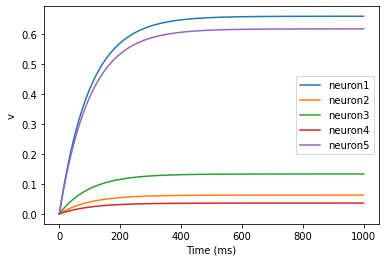

In [ ]:
for i in range(5):
  plot(M1.t/ms, M1.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

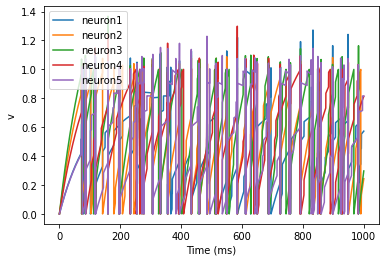

In [ ]:
for i in range(5):
  plot(M2.t/ms, M2.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

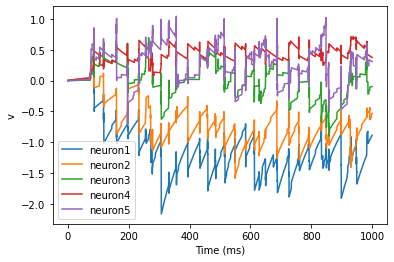

In [ ]:
for i in range(5):
  plot(M3.t/ms, M3.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

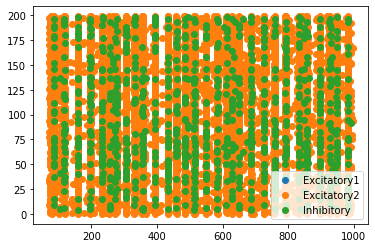

In [ ]:
plt.scatter(exc1.t/ms,
           exc1.i, label='Excitatory1')
plt.scatter(exc2.t/ms,
           exc2.i, label='Excitatory2')
plt.scatter(inh.t/ms,
           inh.i, label='Inhibitory')

plt.legend()

In [ ]:
start_scope()


eqsx1 = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

eqsx2 = '''
dv/dt = (I + 0.5 + 1.5 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''

eqsi = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

I1 = []
I2 = []
I3 = []
tau = []

for i in range(200):
  I1.append(random.random() * 2) 
  I2.append(random.random())
  I3.append(random.random() * 0.1)
for i in range(200):
  tau.append(100)
  
Gx1 = NeuronGroup(200, eqsx1, threshold='v>1', reset='v = 0', method='exact')
Gx2 = NeuronGroup(200, eqsx2, threshold='v>1', reset='v = 0', method='euler')
Gi = NeuronGroup(200, eqsi, threshold='v>1', reset='v = 0', method='exact')

Gx1.I = I1
Gx1.tau = tau*ms
Gx2.I = I2
Gx2.tau = tau*ms
Gi.I = I3
Gi.tau = tau*ms

Se1 = Synapses(Gx1, Gx1, on_pre='v_post += 0.1')
Se2 = Synapses(Gx2, Gx2, on_pre='v_post += 0.1')
Sei1 = Synapses(Gx1, Gi, on_pre='v_post += 0.05')
Sei2 = Synapses(Gx2, Gi, on_pre='v_post += 0.05')
Sii =  Synapses(Gi, Gi, on_pre='v_post -= 0.2')

Se1.connect(p=0.05)
Se2.connect(p=0.05)
Sei1.connect(p=0.05)
Sei2.connect(p=0.05)
Sii.connect(p=0.1)

exc1 = SpikeMonitor(Gx1)
exc2 = SpikeMonitor(Gx2)
inh = SpikeMonitor(Gi)

M1 = StateMonitor(Gx1, 'v', record=True)
M2 = StateMonitor(Gx2, 'v', record=True)
M3 = StateMonitor(Gi, 'v', record=True)

run(1000*ms)

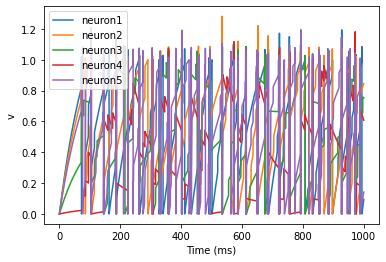

In [ ]:
for i in range(5):
  plot(M1.t/ms, M1.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

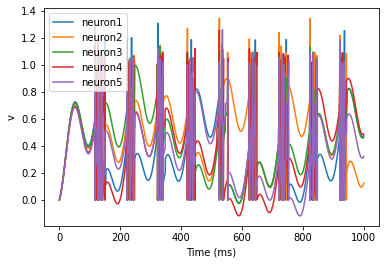

In [ ]:
for i in range(5):
  plot(M2.t/ms, M2.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

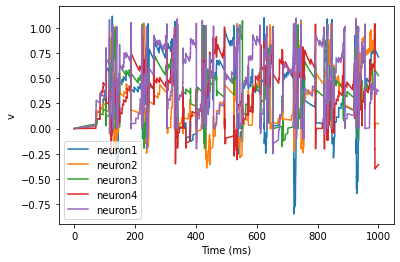

In [ ]:
for i in range(5):
  plot(M3.t/ms, M3.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

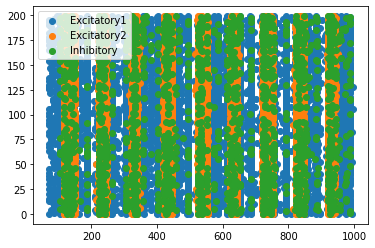

In [ ]:
plt.scatter(exc1.t/ms,
           exc1.i, label='Excitatory1')
plt.scatter(exc2.t/ms,
           exc2.i, label='Excitatory2')
plt.scatter(inh.t/ms,
           inh.i, label='Inhibitory')

plt.legend()